<center style="font-size: 2em; font-weight: bold;"> Clase 1 </center>


Curso: Estadistica para Economistas
Tema: Pobreza Monetaria

Analisis de informacion de la pobreza 2021, se busca como objetivos:
- Manipulacion de datos 
- Procesamiento de variables

Conocimiento de las principales comandos:
- libreria pandas
- Importar / exportar datos
- value_counts
- head o tail 
    

# Carga de librerias

In [13]:
import pandas
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


# Importar una base de datos

In [2]:
base = pandas.read_excel('BD_1.xlsx')

Para poder cargar la base de datos y mostrar las primeras 5 observaciones

In [3]:
base.head(5)

,rid_hogar,rpond,ry,rly,rpobre,rbrecha,rseveri,rmiembros,rArea,rDpto,rDpto2,rDpto3
0,500904111,954.745483,690.014160,6.536712,No Pobre,0.0,0.0,2,Urbano,Amazonas,Amazonas,Amazonas
1,500909811,1909.490967,642.726746,6.465720,No Pobre,0.0,0.0,4,Urbano,Amazonas,Amazonas,Amazonas
2,500912611,2386.863770,1588.947144,7.370827,No Pobre,0.0,0.0,5,Urbano,Amazonas,Amazonas,Amazonas
3,503000511,1019.342834,392.365875,5.972195,No Pobre,0.0,0.0,7,Urbano,Amazonas,Amazonas,Amazonas
4,503001211,436.861206,360.885315,5.888560,No Pobre,0.0,0.0,3,Urbano,Amazonas,Amazonas,Amazonas


Para poder cargar la base de datos y mostrar las ultimas 5 observaciones

In [4]:
base.tail(5)

,rid_hogar,rpond,ry,rly,rpobre,rbrecha,rseveri,rmiembros,rArea,rDpto,rDpto2,rDpto3
34240,2034803211,285.156586,444.624115,6.097229,No Pobre,0.0,0.0,4,Rural,Ucayali,Ucayali,Ucayali
34241,2034806611,142.578293,772.439697,6.649554,No Pobre,0.0,0.0,2,Rural,Ucayali,Ucayali,Ucayali
34242,2034806711,71.289146,1133.397461,7.032975,No Pobre,0.0,0.0,1,Rural,Ucayali,Ucayali,Ucayali
34243,2034806911,142.578293,861.900818,6.759140,No Pobre,0.0,0.0,2,Rural,Ucayali,Ucayali,Ucayali
34244,2034807011,427.734863,372.070435,5.919083,No Pobre,0.0,0.0,6,Rural,Ucayali,Ucayali,Ucayali


# Manipulacion de datos

## Caracterizacion de informacion

Se describe la informacion de la base de datos 
- comando: info() , descripcion de informacion


In [5]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34245 entries, 0 to 34244
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rid_hogar  34245 non-null  int64  
 1   rpond      34245 non-null  float64
 2   ry         34245 non-null  float64
 3   rly        34245 non-null  float64
 4   rpobre     34245 non-null  object 
 5   rbrecha    34245 non-null  float64
 6   rseveri    34245 non-null  float64
 7   rmiembros  34245 non-null  int64  
 8   rArea      34245 non-null  object 
 9   rDpto      34245 non-null  object 
 10  rDpto2     34245 non-null  object 
 11  rDpto3     34245 non-null  object 
dtypes: float64(5), int64(2), object(5)
memory usage: 3.1+ MB


## Transformacion de variables

La variable que se analizara es la variable **rpobre**, donde se describe que es un objecto. 

In [6]:
base['rpobre'].value_counts()

No Pobre    27905
Pobre        6340
Name: rpobre, dtype: int64

Informacion de la proporcion de casos en cada tipo de pobreza:
- option normalize usando **normalize == True**

In [7]:
base['rpobre'].value_counts(normalize = True).round(2)

No Pobre    0.81
Pobre       0.19
Name: rpobre, dtype: float64

Tabulacion de informacion por area y tipo de pobreza

In [8]:
pandas.crosstab(base['rArea'], base['rpobre'])

rpobre,No Pobre,Pobre
rArea,,
Rural,8609,3561
Urbano,19296,2779


Mostrar la tabla cruzada agregando los totales (filas y columnas)

In [9]:
pandas.crosstab(base['rArea'], base['rpobre'], margins= True, margins_name='Total')

rpobre,No Pobre,Pobre,Total
rArea,,,
Rural,8609,3561,12170
Urbano,19296,2779,22075
Total,27905,6340,34245


Realizar la tabla cruzada utilizando dos decimales

In [10]:
pandas.crosstab(base['rArea'], base['rpobre'], normalize = True,margins= True, margins_name='Total').round(2)

rpobre,No Pobre,Pobre,Total
rArea,,,
Rural,0.25,0.10,0.36
Urbano,0.56,0.08,0.64
Total,0.81,0.19,1.00


filtramos variables de la base de datos
- rid_hogar
- rpobre
- rDpto

In [11]:
data = base[['rid_hogar','rDpto','rpobre']]

In [12]:
data.head(5)

,rid_hogar,rDpto,rpobre
0,500904111,Amazonas,No Pobre
1,500909811,Amazonas,No Pobre
2,500912611,Amazonas,No Pobre
3,503000511,Amazonas,No Pobre
4,503001211,Amazonas,No Pobre


# Graficos

## Grafico de barras

Se realiza un grafico de informacion po tipo de pobreza y considerando el calculo del gasto promedio 

<AxesSubplot: xlabel='rpobre', ylabel='ry'>

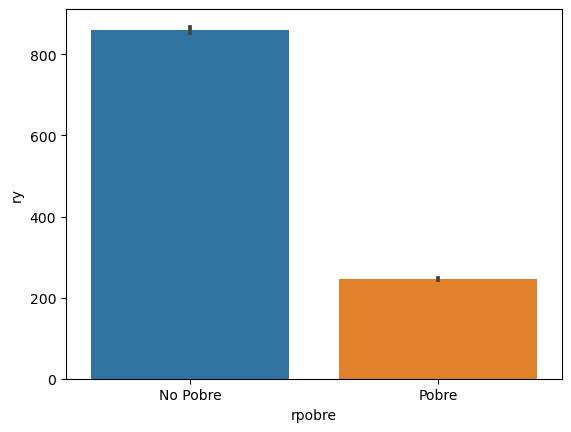

In [14]:
sns.barplot(data=base, x='rpobre', y='ry')

<AxesSubplot: xlabel='rArea', ylabel='ry'>

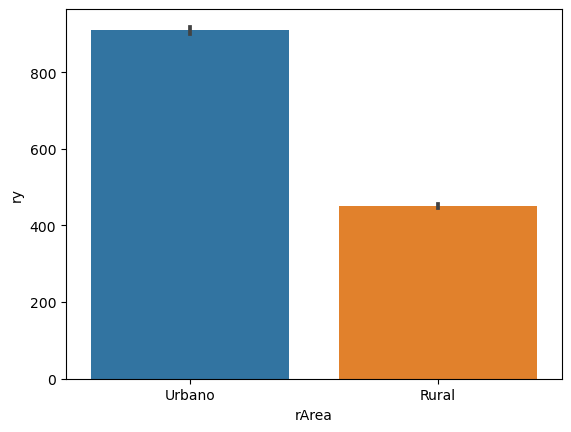

In [18]:
sns.barplot(data=base, x='rArea', y='ry')

## Grafico de histograma

<AxesSubplot: xlabel='ry', ylabel='Count'>

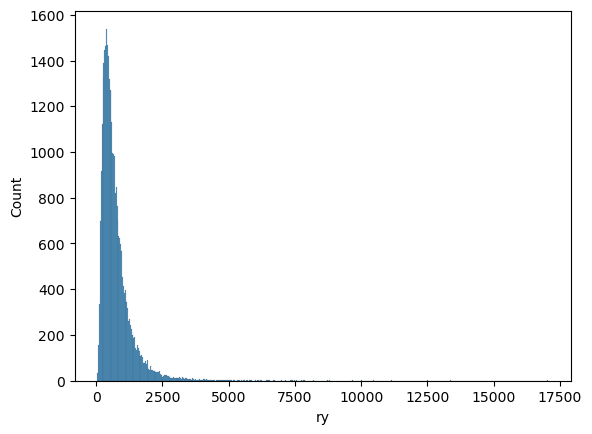

In [23]:
sns.histplot(base, x='ry')

<AxesSubplot: xlabel='ry', ylabel='Count'>

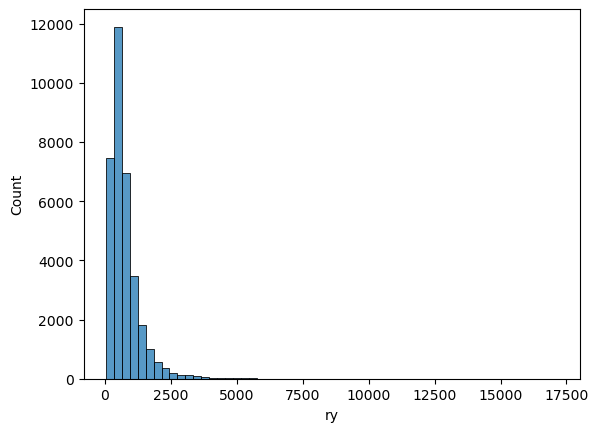

In [29]:
# Se puede especificar el numero de bins
sns.histplot(base, x='ry', binwidth=300)

# Exportar informacion 

In [ ]:
# Exportar hacia excel
data.to_excel('BD_filtrada.xlsx')

In [ ]:
# Exportar hacia csv
data.to_csv('BD_filtrada.csv')